# Worldwide Carbon Emissions and Global Warming
## Spring 2024 Data Science Project
#### Evan Song and Sanchay Ravindiran

# Team Member Contribution Percentages

**Member 1:** Evan Song, Contribution: 100%.

**Member 2:** Sanchay Ravindiran, Contribution: 100%.


We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Evan Song - May 7th, 2024

Sanchay Ravindiran - May 7th, 2024

# Team Member Contribution Summaries

**Evan Song:** Implemented data curation, worked on correlational analysis and hypothesis testing. Also worked on primary analysis in general, as well as primary analysis graphs/ visualizations and the interactive portion.

**Sanchay Ravindiran:** Implemented exploratory analysis, final takeaways/ looking ahead section following data analysis. Also worked on primary analysis in general, specifically neural net and PCA implementation.

Note: Both of us **collaborated extensively** on the entirety of the project - it is difficult to assign strict boundaries on what either of us worked on ourselves since we both worked on everything in meetings and often guided each other.



## Table of Contents:
Introduction

Data Curation

Exploratory Analysis

Primary Analysis

Visualization

Insights and Conclusions

# Introduction


The two main topics we have chosen to focus on are worldwide **carbon emissions** and **climate change.** Through analysis, we aim to answer questions about global trends in both emissions and temperatures, identify factors influencing these trends, and assess the predictability of future values for both emissions and temperatures. It's crucial to address these questions because understanding global trends in carbon emissions helps us gauge our progress toward mitigating climate change. Identifying influential factors enables us to target interventions effectively, while **predicting future values** aids in developing informed policies and strategies for sustainable environmental management.

# Data Curation

In this project, we will be using data on worldwide CO2 emissions and global temperatures compiled using data from the FAO (Food and Agriculture Organization of the United Nations) and IPCC (Intergovernmental Panel on Climate Change) and published on [Kaggle](https://www.kaggle.com/code/sasakitetsuya/co2-emission-gap-among-countries-clustering-pca/input).

Right now, it's still in the form of a CSV, or comma separated value list, which is hard to work with in its raw form. **Let's turn our data into a Pandas dataframe, to make it easier to explore and process!**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
from datetime import datetime

agrofood = pd.read_csv('Agrofood_co2_emission.csv')
agrofood.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Great! Now that we have our dataframe, let's do some exploration. First, we'll see what columns and types our data is, and check if we need to clean anything.

In [2]:
agrofood.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

Hmmm, looks like the populations are floats instead of ints, and the years are ints instead of datetimes. Let's fix that!

In [3]:
agrofood.Year = pd.to_datetime(agrofood.Year, format='%Y')

agrofood['Rural population'] = agrofood['Rural population'].astype(int)
agrofood['Urban population'] = agrofood['Urban population'].astype(int)
agrofood['Total Population - Male'] = agrofood['Total Population - Male'].astype(int)
agrofood['Total Population - Female'] = agrofood['Total Population - Female'].astype(int)

agrofood.dtypes

Area                                       object
Year                               datetime64[ns]
Savanna fires                             float64
Forest fires                              float64
Crop Residues                             float64
Rice Cultivation                          float64
Drained organic soils (CO2)               float64
Pesticides Manufacturing                  float64
Food Transport                            float64
Forestland                                float64
Net Forest conversion                     float64
Food Household Consumption                float64
Food Retail                               float64
On-farm Electricity Use                   float64
Food Packaging                            float64
Agrifood Systems Waste Disposal           float64
Food Processing                           float64
Fertilizers Manufacturing                 float64
IPPU                                      float64
Manure applied to Soils                   float64


What about missing data?

In [4]:
agrofood.count()

Area                               6965
Year                               6965
Savanna fires                      6934
Forest fires                       6872
Crop Residues                      5576
Rice Cultivation                   6965
Drained organic soils (CO2)        6965
Pesticides Manufacturing           6965
Food Transport                     6965
Forestland                         6472
Net Forest conversion              6472
Food Household Consumption         6492
Food Retail                        6965
On-farm Electricity Use            6965
Food Packaging                     6965
Agrifood Systems Waste Disposal    6965
Food Processing                    6965
Fertilizers Manufacturing          6965
IPPU                               6222
Manure applied to Soils            6037
Manure left on Pasture             6965
Manure Management                  6037
Fires in organic soils             6965
Fires in humid tropical forests    6810
On-farm energy use                 6009


**We do have some missing data :(**

Luckily, when inspecting the data more closely, we see that the data that is missing is missing consistently through the years. In other words, if a country is missing data for one year, it will be missing data *for every year*. Since we are going to be looking primarily at the distribution of data per year, the missing data should affect our conclusions minimally.

**In addition, the 2 columns that we will be focusing most on, emissions and average temperature, are fully complete.**


# Exploratory Analysis

# Method 1: Longitudinal Boxplot for Data Visualization



We will now create a boxplot using the data we've been analyzing so far. We will then observe the resulting boxplot to analyze the statistical features of this dataset so that we can determine how carbon emissions have evolved, globally, over the course of 30 years from 1990 to 2020.


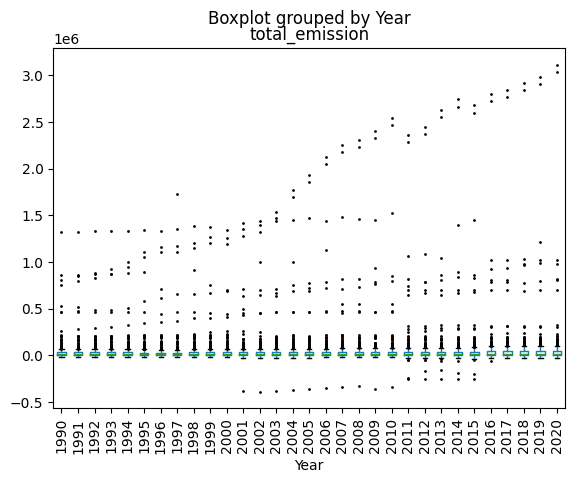

In [5]:
# Change the Year column in the dataframe so that it only holds the year rather than the entire
# datetime equivalent, which can take up too much space on boxplots.
agrofood_boxplot = agrofood.copy()
agrofood_boxplot['Year'] = agrofood['Year'].apply(lambda x: x.year)
# Plot boxplot for total emissions by year
boxplot = agrofood_boxplot.boxplot(column = 'total_emission', by = 'Year', grid = False, rot = 90, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})

Observing our boxplot, we can immediately see that it is difficult to pinpoint the general trends of carbon emissions over the course of 30 years *since the median appears to remain almost unchanged*. This does not make sense - upon inspecting our dataset, we can see that there is a clear increase in total carbon emissions, so shouldn't the median should be increasing consistently for every year?

The median is likely appearing to remain unchanged as a result of the abundance of outliers for every year. On the boxplot we can see that there are a great many total emission datapoints concentrated around the medians. Each of these points represent the total emissions of a particular country. There are probably significant differences between the datapoints in these tight clusters from year to year, **but these small differences are dwarfed by the extreme outliers that are also present.**

However, since there aren't any relatively significant increases in the median, **we know that elevated carbon emissions are the fault of a few outlier countries.** This is a good thing! If we did observe a significant increase in the median on our boxplot, then it'd mean that *all* countries are producing high net carbon emissions. We now know that the fault of global warming lies mostly with a few irresponsible countries.

We can still draw our boxplot again, but this time omitting outliers to get a better picture of our data.

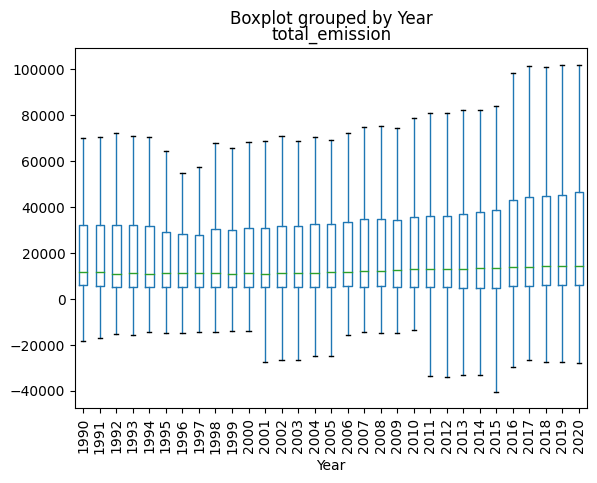

In [6]:
# Once again plot a boxplot for total emissions by year , but this time do not show fliers (outliers)
boxplot = agrofood_boxplot.boxplot(column = 'total_emission', by = 'Year', grid = False, rot = 90, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'}, showfliers=False)

After omitting outliers from our boxplot, we can see that maximum carbon emissions have shifted dramatically from the **3 million kilotons in our prior boxplot to a mere 100,000 kilotons.**

With this better look at our data, we can still see that the median hardly changes from 1990 to 2020. However, we can also observe that the upper quartile for carbon emissions increases consistently.

Since the yearly changes in the median carbon emissions are still indiscernible, we may need a line graph that exclusively displays changes in this median throughout the years. In other words - just how much are median total emissions increasing?

<Axes: xlabel='Year'>

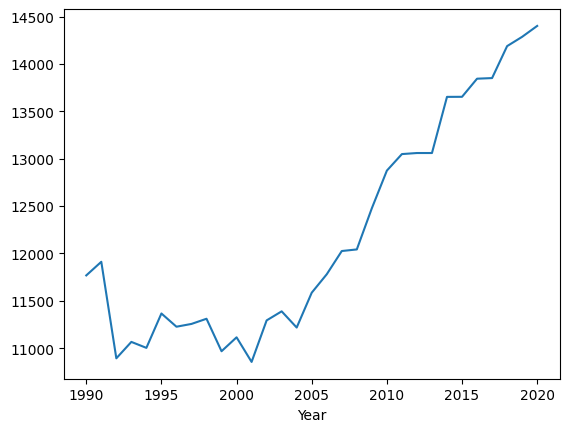

In [7]:
# Get median total emissions and group the results by year
median_emissions = agrofood_boxplot.groupby('Year')['total_emission'].median()
# Plot a line graph for these total emissions by year
median_emissions.plot.line()

Now after plotting this line graph, we can clearly see that median total emissions have increased from 12,000 kiltons to 14,500 kilotons over the course of 30 years.

But this is a relatively small increase in total emissions in the context of emissions produced by outliers. And so, this result confirms our idea that the median has barely shifted because the vast majority of countries have not significantly altered their carbon emissions from 1990 to 2020. **The fault is with a small few outlier countries!**

But we're not just interested in emission data - we want to look at how these emission increases will affect global temperatures. In order to do so, we will examine how the *change in average temperature* has shifted for every country from 1990 to 2020. We can draw another boxplot to figure this out.

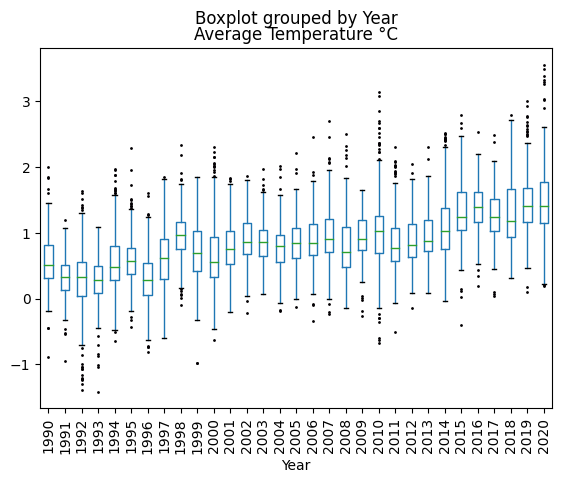

In [8]:
# Plot a boxplot, but this time for average temperature by year
boxplot = agrofood_boxplot.boxplot(column = 'Average Temperature °C', by = 'Year', grid = False, rot = 90, flierprops = {'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})

Observing this boxplot, we see that the median average change in temperature has risen dramatically from 1990 to 2020. For the median change in temperature across all countries to increase like this is in only 30 years is unprecedented, and we can get an even clearer picture by once again omitting outliers.

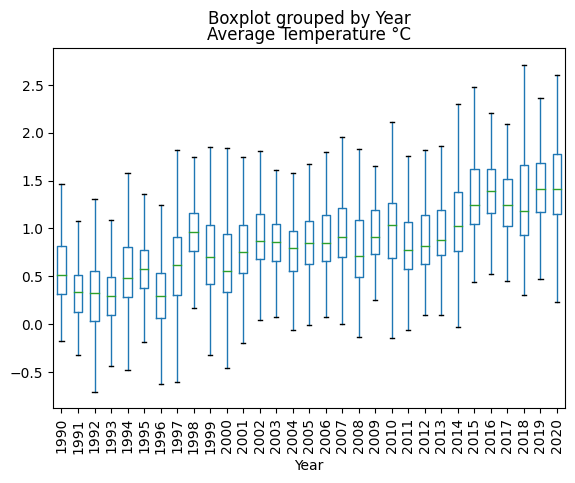

In [9]:
# Again, plot a boxplot for average temperature by year, but this time do not show fliers (outliers)
boxplot = agrofood_boxplot.boxplot(column = 'Average Temperature °C', by = 'Year', grid = False, rot = 90, showfliers=False)

After omitting outliers we can observe that changes in median average change in temperature are largely unchanged. The outliers for median average change in temperature are less extreme and more evenly distributed than those of the median total emissions.

We can then draw a line graph to focus solely on changes in median average change in temperature from 1990 to 2020. This will allow us to observe just how much average temperatures have risen across all included countries in 30 years.

<Axes: xlabel='Year'>

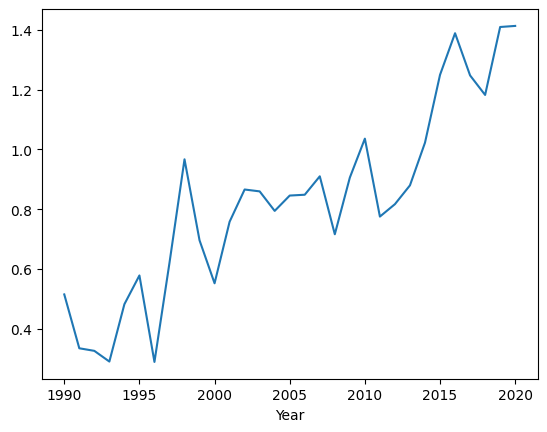

In [10]:
# Get median average change in temperatures, grouping results by year
median_temps = agrofood_boxplot.groupby('Year')['Average Temperature °C'].median()
# Plot line graph for average temperatures by year
median_temps.plot.line()

Looking at this line graph, we can clearly observe a dramatic increase in median average change in temperatures from only ~0.5 degrees in 1990 to ~1.4 degrees in 2020. Interestingly, the positive trending on this line graph mirrors the positive trend of the previously drawn line graph detailing changes in total emissions over time. **Could there be a correlation between total emissions and average change in temperature?**

# Method 2: Correlation Analysis for Emissions and Temperature

Both emissions and temperatures seem to have risen in the past 30 years. In fact, it seems as though the rise in temperature may be linked to the rise in emissions. This may seem like common sense, but it's best to avoid assumptions in data science. Instead, let's plot a scatterplot relating the median emission to the median temperature for each year.

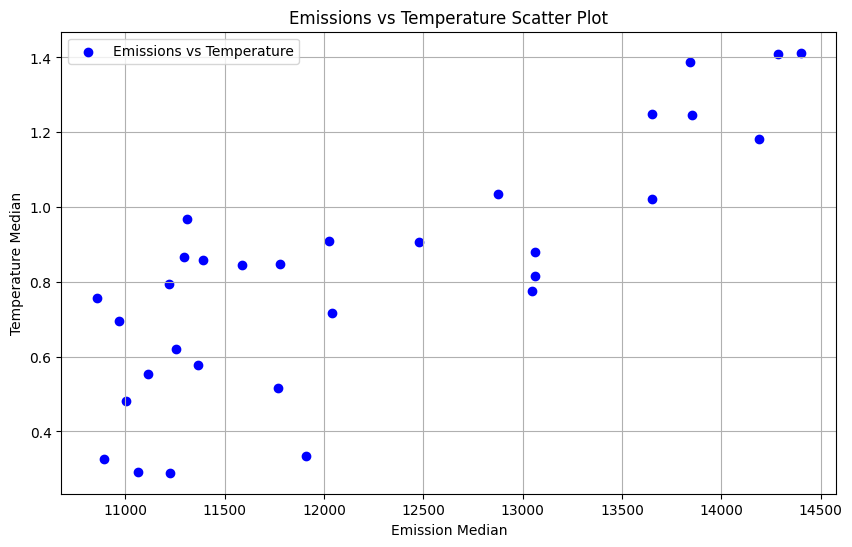

In [11]:
emission_medians = agrofood.groupby(['Year'])['total_emission'].median()
temp_medians = agrofood.groupby(['Year'])['Average Temperature °C'].median()
# Create a dataframe that we will use to chart a scatterplot, comprised of median emission and median temperature columns
medians_scatter = pd.DataFrame({
    'Emission Median': emission_medians,
    'Temperature Median': temp_medians
})
# Specify attributes for the scatterplot, specifically figure size (so that the plot fits
# nicely onto the screen), title, axis labels, and the legend.
plt.figure(figsize=(10, 6))
plt.scatter(medians_scatter['Emission Median'], medians_scatter['Temperature Median'], color='blue', label='Emissions vs Temperature')
plt.title('Emissions vs Temperature Scatter Plot')
plt.xlabel('Emission Median')
plt.ylabel('Temperature Median')
plt.legend()
plt.grid(True)
plt.show()

As we can see, there seems to be a positive relationship between emissions and change in temperature. But how strong of a relationship, exactly? A correlation coefficient would help! :)


In [12]:
# Compute Pearson's correlation coefficient and display it
correlation_coefficient = medians_scatter['Emission Median'].corr(medians_scatter['Temperature Median'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.8092146340244143


Our correlation coefficient of 0.8092146340244143 indicates a **strong positive linear relationship** between emissions and change in temperature. This value, which is close to 1, suggests that as emissions increase, temperatures tend to increase as well. Notably, correlation does not imply causation, so we can't say that higher emissions cause higher temperatures, just that an increase in emissions is strongly linked to an increase in temperatures.

If you want to learn more about correlation or correlation coefficients, check out [this link](https://www.w3schools.com/datascience/ds_stat_correlation.asp).

# Method 3: Hypothesis Test (Wilcoxon Signed Rank Test on Differences)

In our analysis in Method 1, we were able to visualize our data, and saw that at first glance, the medians did not appear to have changed very much over the years. This begs the question, **have emissions and temperatures really increased?**

In order to answer this, we will look at the emissions and changes in temperatures in each country in both 1990 and 2020, and then determine whether there was a significant increase in both temperature and emissions, separately.

If you don't have any experience with hypothesis tests, you may want to look over [this resource](https://www.analyticsvidhya.com/blog/2021/07/hypothesis-testing-made-easy-for-the-data-science-beginners/) before going through.

For each country, we will take the difference in emissions from 2020 and 1990, then visualize the data to see whether a parametric or nonparametric test seems more appropriate.

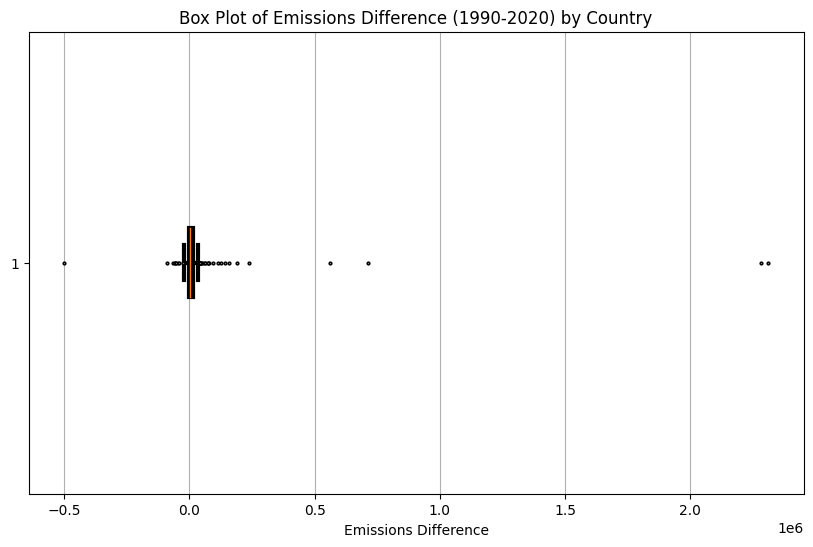

In [13]:
# Filter agrofood to get only the endpoint/ boundary years (ie emissions at 1990 and 2020).
emission_diff_df = agrofood[(agrofood['Year'].dt.year == 1990) | (agrofood['Year'].dt.year == 2020)].pivot(index='Area', columns='Year', values='total_emission')
# Construct differences between each boundary
emission_diff_df['Emissions_Difference'] = emission_diff_df[datetime(2020, 1, 1)] - emission_diff_df[datetime(1990, 1, 1)]
# Drop all missing values from the result - occasionally there's a start value and no end value, or vice versa.
emission_diffs = emission_diff_df['Emissions_Difference'].dropna()

# visualization time!
plt.figure(figsize=(10, 6))
# Create a boxplot, specifying attributes like the color, thickness and size of outliers, whiskers and edges (caps) of
# whiskers.
plt.boxplot(emission_diffs.values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', linewidth=3),
            flierprops=dict(marker='o', markerfacecolor='grey', markersize=2, markeredgecolor='black'),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3))
# Specify titles for boxplot itself as well as axis
plt.title('Box Plot of Emissions Difference (1990-2020) by Country')
plt.xlabel('Emissions Difference')
# Show gridlines on the x-axis
plt.grid(axis='x')
# Show resulting boxplot
plt.show()

We can see that there are a lot of outliers and that some of them are quite large, so a non-parametric test seems to be the most appropriate. As such, **we will use a Wilcoxon Signed Rank test** to determine whether or not emissions have increased globally regardless of the outliers.

We will use the following null and alternative hypotheses:

$H_0=$ difference in emissions is = 0

$H_a=$ difference in emissions is > 0


In [14]:
# Conduct Wilcoxon Signed Rank Test
statistic, p_value = stat.wilcoxon(emission_diffs, alternative='greater')

# Print the test results
print(f'Wilcoxon Test Statistic: {statistic}')
print(f'P-value: {p_value}')

Wilcoxon Test Statistic: 13675.0
P-value: 3.601802418647316e-08


Wow, that's a tiny p-value. Since our p-value is much smaller than the standard alpha of 0.05, we can reject the null hypothesis and conclude with a good deal of confidence that emissions have increased in the past 30 years, even without accounting for the massive outliers.

Now, let's do the same for changes in temperatures!

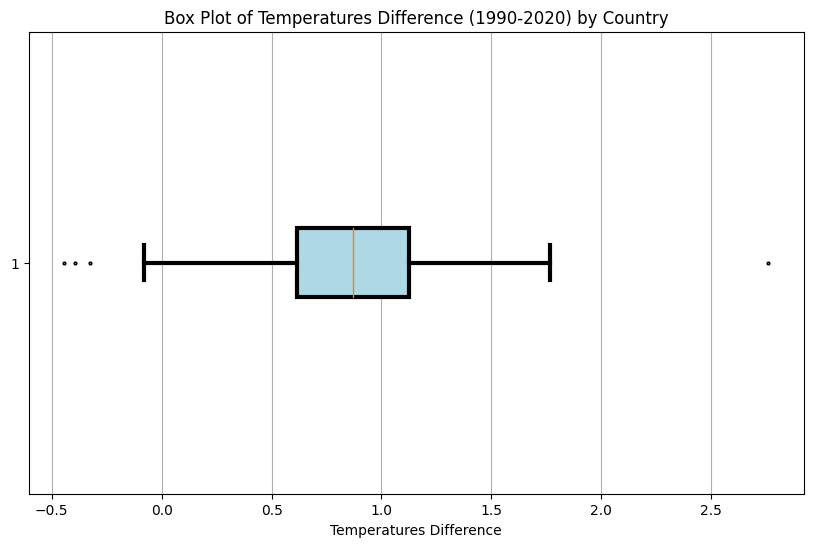

In [15]:
# Like before, filter agrofood to get only the endpoint/ boundary years (ie changes in temperatures at 1990 and 2020).
temp_diff_df = agrofood[(agrofood['Year'].dt.year == 1990) | (agrofood['Year'].dt.year == 2020)].pivot(index='Area', columns='Year', values='Average Temperature °C')
# Construct differences between each boundary
temp_diff_df['Temperatures_Difference'] = temp_diff_df[datetime(2020, 1, 1)] - temp_diff_df[datetime(1990, 1, 1)]
# Drop all missing values from the result - occasionally there's a start value and no end value, or vice versa.
temp_diffs = temp_diff_df['Temperatures_Difference'].dropna()

# Visualization time!
plt.figure(figsize=(10, 6))
# Again, create a boxplot, specifying attributes like the color, thickness and size of outliers, whiskers and edges (caps) of
# whiskers.
plt.boxplot(temp_diffs.values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', linewidth=3),
            flierprops=dict(marker='o', markerfacecolor='grey', markersize=2, markeredgecolor='black'),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3))
# Specify titles for boxplot itself as well as axis
plt.title('Box Plot of Temperatures Difference (1990-2020) by Country')
plt.xlabel('Temperatures Difference')
# Show gridlines on the x-axis
plt.grid(axis='x')
# Show resulting boxplot
plt.show()

This data looks much better than the emissions data, with many fewer outliers and less extreme outliers. However, there still are a couple of outliers, so we'll use the Wilcoxon again just to be safe.
Using

$H_0=$ difference in temperatures is = 0

$H_a=$ difference in temperatures is > 0

In [16]:
statistic, p_value = stat.wilcoxon(temp_diffs, alternative='greater')

# Print the test results
print(f'Wilcoxon Test Statistic: {statistic}')
print(f'P-value: {p_value}')

Wilcoxon Test Statistic: 18851.0
P-value: 1.8620356935363395e-33


Our p-value was even smaller this time! We can reject the null hypothesis and conclude that there is very strong evidence that temperatures have also risen in the past 30 years.

## Final Takeaways and Looking Ahead

**From method 1** we analyzed trends in total emissions and average temperatures to determine the relative importance of outliers. **We saw that both total emissions and average changes in temperatures seemed to trend upwards**, and that total emissions were largely the contribution of a select few outlier countries. The upward trend in median average change in temperature appeared much more pronounced, indicating that the average changes in temperatures were much more resistant to outliers - **meaning all countries experienced, more or less, an increase in temperature.**

**And in method 2** we built on our conclusion from method 1 - that both total emissions and average changes in temperatures appeared to trend upward simultaneously. We hypothesized that total emissions and average temperatures might be correlated with one another, and we computed a Pearson's correlation coefficient in order to determine the degree of association between these variables. **We concluded that there was a strong positive linear correlation between total emissions and average changes in temperatures.**

**Lastly, in method 3** we conducted a hypothesis test to determine whether there was a statistically significant increase in both average temperatures and emissions from over 30 years. We decided to utilize a Wilcoxon Signed Rank Test rather than a T-Test because there were frequent, extreme outliers in both average temperatures and total emissions (*but especially in total emissions*). The results of this test are far more definitive than the T-Test because it works even when discounting the major outliers which would skew the probabilities even lower. Despite this, the test resulted in 2 extremely small P-values, **indicating that there is strong evidence that average temperature and total emissions have increased considerably from 1990 to 2020.**

**Moving forward**, we will not only focus on simple, one-dimensional connections between variables in the agrofood dataset, but also multivariate analysis between several variables. The strong positive trends we've seen in both total emissions and average change in temperature indicate that **we may be able to use Machine Learning (ML) to create a predictive model which will be able to use global carbon emissions trends to anticipate (and hopefully defend against) global warming**.

# Primary Analysis

In our data curation stage we conducted an initial exploration of our dataset and found that there was a strong positive correlation between both emissions and average change in temperature. We can now proceed to our analysis, where we will use a **multi-layer feedforward neural network (NN) Machine Learning (ML) algorithm** to perform multivariate regression on our dataset - this will allow us to predict future emissions and temperature data given multiple input features, or columns.

However, our dataset in its current form is unsuitable as training and test data for our ML algorithm. This is because our dataset contains several **potentially redundant columns** that may be linearly correlated with each other. These redundant columns can introduce unwanted noise, which can result in overfitting our ML model, and they can even reduce its performance. This is what we call the **Curse of Dimensionality**, and we need to address this issue by reducing the dimensionality - number of columns or features - in our dataset before we can proceed to our ML analysis. We will perform this dimensionality reduction by utilizing Principle Component Analysis (PCA), a technique used to reduce the dimensionality of a dataset by identifying features with minimal linear correlation.

We will begin by performing PCA to reduce the dimensionality of our dataset. PCA involves selecting features with the maximum variance (the most spread out, linearly uncorrelated features). For more info on PCA, check out [this link](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

We will first split the chosen principle components into **random training and test subsets**. This will allow our ML algorithm to evenly disperse its testing and training throughout the entire dataset, helping to eliminate the bias that could arise from an uneven dataset train/ test split.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop any missing entries from dataset - later when we conduct PCA
# we cannot have any NaN values in our data.
agrofood = agrofood.dropna()

# Get the number of features in our dataset
feature_length = len(agrofood.columns)

# Get our input features - in this case our inputs are all features excluding
# the final two features: total emissions and average temperature.
X = agrofood.iloc[:, 2:(feature_length - 2)]

# Then get our output features (labels), total emissions and average
# temperatures
y = agrofood.iloc[:, [feature_length - 1, feature_length - 2]]

# Perform random train/ test split using our input and output features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using our random training and test splits for our dataset we can then use PCA to select input features with maximum variance. This will essentially allow us to handpick the most informative features with the greatest predictive power in the dataset and to discard other redundant features.

But this begs the question: how many input features should we keep in our dataset? We could use a technique like *Minka's MLE*, which guesses the optimal number of features to retain internally, but is simply an educated guess. Let's try to obtain the best number of features manually by testing different principle component counts and observing the **subsequent changes in the maximum variance captured.** This is a form of the elbow method for choosing hyperparameters.

In [18]:
from sklearn.decomposition import PCA

variance_list = []

# Use our elbow method to test for 1 to 10 different
# principle component counts in PCA
for n in range(1, 10):

  # Initialize PCA instance - specifying n_components as the current
  # principle component count
  pca = PCA(n_components = n)

  # Create copies of our train and test dataset splits
  X_train_tmp = X_train.copy()
  X_test_tmp = X_test.copy()

  # Fit the training split for our dataset and apply dimensionality
  # reduction via PCA
  X_train_tmp = pca.fit_transform(X_train_tmp)

  # Apply dimensionality reduction on test split
  X_test_tmp = pca.transform(X_test_tmp)

  # List computed variance of each feature selected by PCA
  pca_variance = pca.explained_variance_

  # Add max variance from current principle component count to
  # list of max variances
  max_variance = pca.explained_variance_ratio_.sum() * 100
  variance_list.append(max_variance)

print(variance_list)

[96.50383739143656, 99.99135930361366, 99.99695645697892, 99.9999500723471, 99.99998792993031, 99.99999475799748, 99.99999718990647, 99.99999879824982, 99.9999991775739]


We can now **plot a graph** that outlines the maximum variance captured as a function of the number of principle components selected from our dataset via PCA.

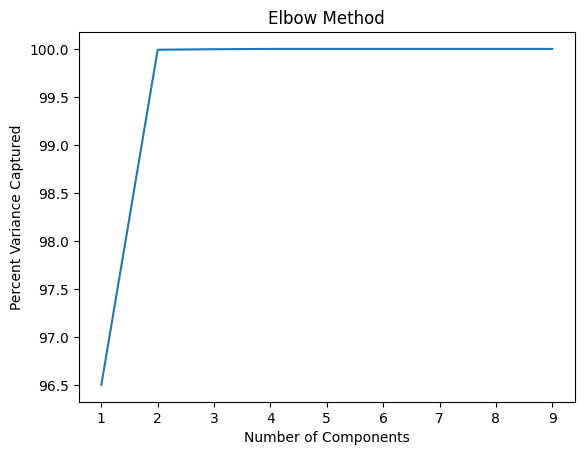

In [19]:
import numpy as np

# Create array from 1 to the total number of principle components tested
n_comps = np.array(range(1, len(variance_list) + 1))

# Plotting the Graph
plt.plot(n_comps, variance_list)
# Specify the title and axis labels for our
# graph
plt.title("Elbow Method")
plt.xlabel("Number of Components")
plt.ylabel("Percent Variance Captured")
# Show the graph
plt.show()

Looking at the graph, we see that there is a very visible "elbow" at 2 principal components, where the percent of variance captured jumps from about 96.5% to nearly 100%. After this, the variance only goes up by fractions of a percent with each additional component. **Thus, we will use n=2** for our true PCA.

In [20]:
pca = PCA(n_components = 2)

# Fit the training split for our dataset and apply dimensionality
# reduction via PCA
X_train = pca.fit_transform(X_train)

# Apply dimensionality reduction on test split
X_test = pca.transform(X_test)

To recap, our PCA instance has provided us with **fitted, transformed training and test splits** created from our original dataset. These splits have also had PCA performed on them to **eliminate redundant columns**, thereby addressing the **curse of dimensionality**. We utilized the elbow method to decide on 2 features as our optimal number of principle components.

Now that we have sufficiently prepared our data, we can move on to using it to train and test our aforementioned multi-layer feedforward ML algorithm. This ML algorithm will use our data to perform supervised learning - learning with labelled training data - so that it can **learn to accurately predict average temperatures and total emissions** given a set of input data. Since our model would be predicting continuous values, it would be performing **regression**. But what is a multi-layer feedforward ML algorithm?

A multi-layer feedforward neural network (NN) is an ML technique **modeled after how the human brain works.** It is comprised of interconnected neurons, or nodes, organized in series of layers. The initial input layer in the neural network is made up of input nodes that feed the network our input data; the middle hiden layer is made up of nodes that separate the input layer from the output layer, which outputs the actual prediction from the neural network. The error of this output prediction is then spread back through the neural network as it is used to subtly adjust the weights of individual neurons, bringing the collective network closer to being correct in a remarkable process called **backpropagation.**



29/29 [==============================] - 0s 1ms/step - loss: 8489509376.0000
Test Loss: 8489509376.0


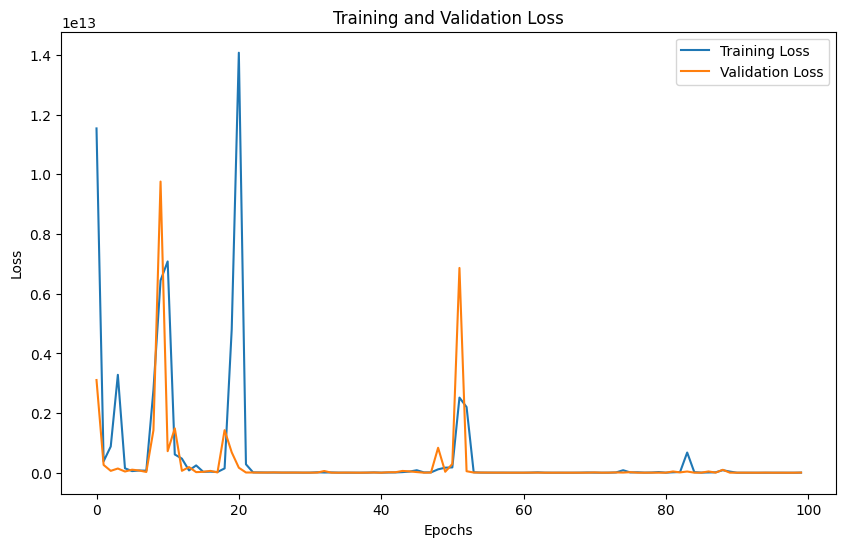

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the neural network model. Rather than inherit directly from
# nn.Module - the PyTorch library's base class comprising baseline
# functionality for neural networks - we instead use initialize a
# Sequential instance, which then inherits from nn.Module under the hood.
# Sequential allows us to create a neural network made of different neuron
# layers - represented by instances of Dense - with our input layer set to
# have 2 neurons (1 neuron per PCA).
model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),  # 2 is the number of PCA components
    Dense(64, activation='relu'),
    Dense(2)  # Output layer with 2 neurons for regression
])

# We set the learning rate - this is the step performed by gradient descent
# in the NN.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with our aforementioned Adam optimizer and
# with Mean Squared Error (MSE) as our loss function
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model using the transformed training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot the training and validation loss over epochs.
plt.figure(figsize=(10, 6))
# Specify legend/ key for our graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# Specify axis labels and the title for our graph
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Show graph
plt.show()

Hmmm, the loss curve has some very visible spikes scattered through the epochs. These are called **"gradient explosions"**, and they occur when the weights in our NN adjust too abruptly after a large step (learning step) in our gradient descent computation, resulting in our loss shooting up briefly. These are **not good** - they suggest that the weights in our model are not converging as they should in a stable manner. In order to get rid of them, let's bring down our learning rate a little bit.


29/29 [==============================] - 0s 2ms/step - loss: 19991132160.0000
Test Loss: 19991132160.0


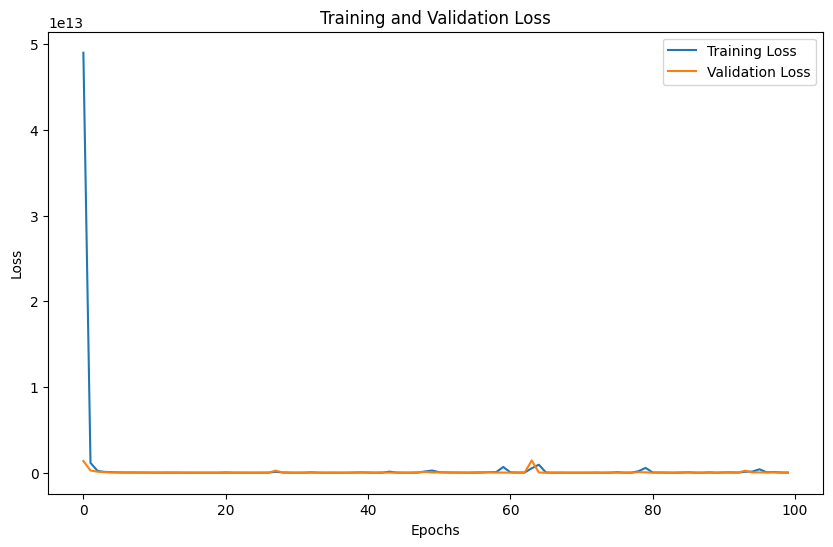

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define our NN as we did before
model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),  # 2 is the number of PCA components
    Dense(64, activation='relu'),
    Dense(2)  # Output layer with 2 neurons for regression
])

# This time we define an optimizer with a much lower learning rate to prevent
# gradient explosions; gradient explosions may occur when a high learning
# rate causes the weights in our model to shift too abruptly after a gradient
# descent step computation is performed, which can cause the loss curve to
# shoot up temporarily.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model with the customized optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model using the transformed training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot the training and validation loss over epochs as we did
# previously, but this time we should see a reduction in our
# gradient explosion issue from before.
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Very nice! The gradient explosions have diappeared. But **why is our final loss still so high?**

Well, since we're using MSE as our loss function, it turns out that any outliers in the data will end up having a huge impact on the loss, especially since the outliers in this dataset sre so heavily skewed. Luckily, the nature of a neural network based regression is inherently used to combat such issues, so the high loss is actually a good sign. It means that the data is **not overfitting to the outliers**, and should still have good performance on real world examples.

# Visualization

Alright, we have our model, but we still don't *really* know whether it's a good fit for the data. Will we really be able to use it for predictions? For categorical data, we could check its accuracy using accuracy, precision, and F1 scores, but since our data is continuous, it's probably better to simply visualize the model and draw conclusions based on the graph.

**Let's visualize!**

313/313 [==============================] - 1s 1ms/step


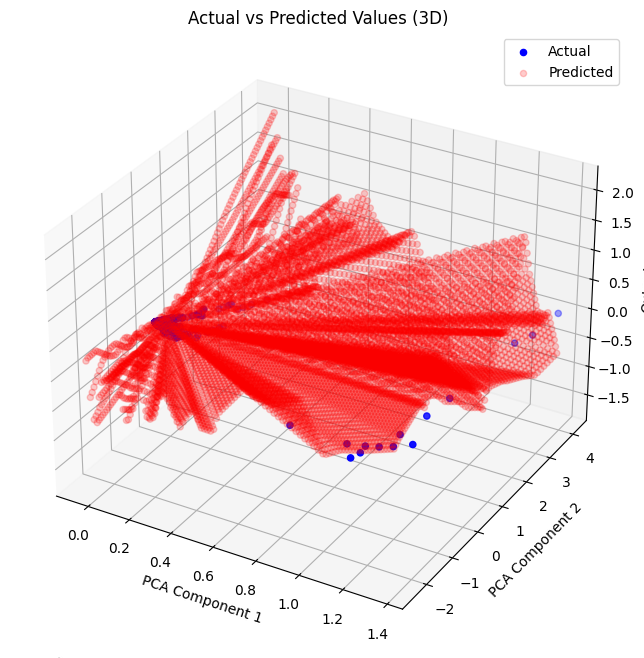

In [23]:
import numpy as np

# First we get the minimum and maximum values for each PCA component
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# Then we generate a mesh - a grid of equally interspaced points - from our
# PCA components.
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Then we combine our seperate coordinates into actual mesh points
grid_points = np.column_stack((x_grid.ravel(), y_grid.ravel()))

# Use the trained model to predict the output for the grid points -
# these grid points are like data points in three-dimensional space (which
# will be graphed below)
predicted_values = model.predict(grid_points)

# Specify the bounds for our 3D graph
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert y_test to a numpy array for easier indexing
y_test_np = y_test.to_numpy()

# Plot the actual data points from the test set onto our
# 3D graph
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_np[:, 0], color='blue', label='Actual')

# Plot the predicted values from the model, but make the predicted
# data points on the graph transparent to distinguish them from our
# actual points
ax.scatter(grid_points[:, 0], grid_points[:, 1], predicted_values[:, 0], color='red', alpha=0.2, label='Predicted')

# Specify axis labels for our graph - since it is
# three-dimensional, there are x, y and z axes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Output')
# Specify the title for our graph
ax.set_title('Actual vs Predicted Values (3D)')
ax.legend()
# Show 3D graph
plt.show()

Okay... the graph looks pretty cool, and seems to be relatively successful at predicting data points. None of the points are that far away from our model's prediction, and though the shape of the model's hyperplane is starting to get a little skewed, it definitely hasn't overfit to the extent that it will severely mispredict any future data points whose principal components are close to the existing ones. **SUCCESS!**

# Insights and Conclusions

Throughout the course of this tutorial we curated our data and discovered hidden insights related to total emissions and average temperatures using a variety of different statistical methods. We then conducted a primary analysis of our data by performing PCA on our dataset and feeding it as input into our feed-forward NN model, which we then used to predict average temperature and total emissions data given an input. Our resulting model was largely effective - it was not prone to overfitting, and this is evident from our three-dimensional graphs on which the prediction surface/ curve does not abruptly shoot toward outlier actual data points.

And while our model was effective according to our final loss and our immediate, intuitive observations of our graphs, it would likely **not be as effective in the real world.** Climate change is a complex, ever-evolving problem comprised of countless different factors. This means that training a NN model on a mere 2 principle components from our dataset would likely not be sufficient to produce nuanced results with real world validity. Our model is simply performing **regression** to predict continuous values.